In [1]:
import numpy as np
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy import nan

from scipy import stats

In [2]:
results = pd.read_csv("csv/Empreinte_relative.csv")

In [4]:
to_drop = ['Resistances', "Connecteurs peripheriques", 'Capaciteurs', 'Conception', 'Others components', 'Transisteurs']



for i in results.index:

    if results["block"].loc[i] in to_drop: 
        results = results.drop(i)
        

In [6]:
results

,indicator,unit,block,value
0,ADPe,%,Power supply,1.61
1,ADPe,%,Shell,0.01
3,ADPe,%,Sensors,16.41
4,ADPe,%,Basic electronic components,71.09
6,ADPe,%,Peripheral connectors,0.10
...,...,...,...,...
251,WU,%,Basic electronic components,65.79
253,WU,%,Peripheral connectors,0.10
254,WU,%,LED,2.81
255,WU,%,Microcontroller,7.86


I have a dataframe with 3 columns: indicator, block and value (relative value)
I want to build only one same histogram that shows for each indicator the relative impact of each block

/var/folders/s8/sjv3qpvd0k5324cm101xsg9m0000gn/T/ipykernel_30688/2374629010.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = results.groupby(['indicator', 'block']).sum().reset_index()


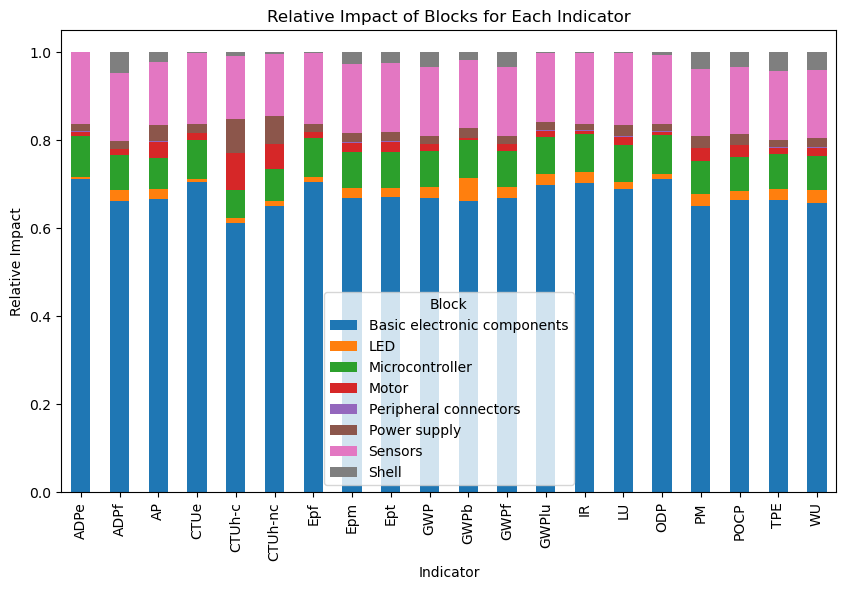

In [8]:
# Group the dataframe by indicator and block and calculate the sum of the values
grouped_df = results.groupby(['indicator', 'block']).sum().reset_index()

# Pivot the dataframe to have blocks as columns and indicators as rows
pivoted_df = grouped_df.pivot(index='indicator', columns='block', values='value')

# Calculate the relative impact of each block for each indicator
relative_impact_df = pivoted_df.div(pivoted_df.sum(axis=1), axis=0)

# Plot the histogram
relative_impact_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Indicator')
plt.ylabel('Relative Impact')
plt.title('Relative Impact of Blocks for Each Indicator')
plt.legend(title='Block')
plt.savefig('Relative Impact of Blocks for Each Indicator')
plt.show()



